In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

In [5]:
dataset = pd.read_csv('/home/vikas/Downloads/petrol_consumption.csv')

In [6]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
dataset.shape

(48, 5)

In [5]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


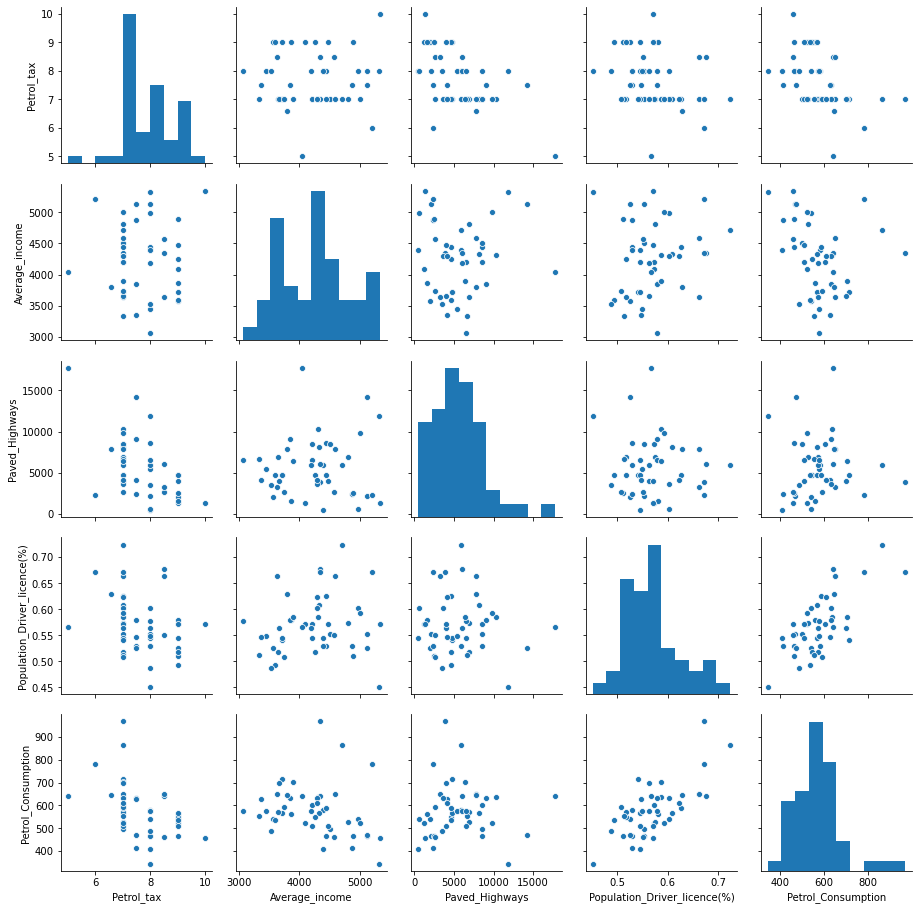

In [6]:
sns.pairplot(dataset)

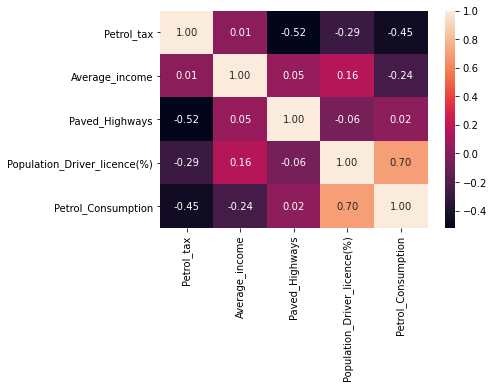

In [7]:
sns.heatmap(dataset.corr(), annot = True , fmt=".2f")
plt.show()

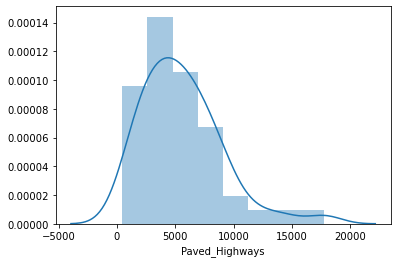

In [8]:
sns.distplot(dataset['Paved_Highways'])

In [31]:
X = dataset[['Petrol_tax','Paved_Highways','Average_income','Population_Driver_licence(%)']]#'Petrol_tax','Paved_Highways'
y = dataset['Petrol_Consumption']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=456)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-27.928146
Paved_Highways,-0.000741
Average_income,-0.067621
Population_Driver_licence(%),1497.936013


In [35]:
regressor.intercept_

229.71704324858183

In [1]:
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

NameError: name 'regressor' is not defined

In [2]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

NameError: name 'plt' is not defined

In [16]:
(y_train-y_pred).mean()

-3.141346831781496e-14

Text(0.5, 0, 'Residuals')

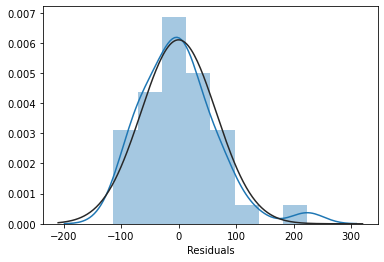

In [17]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

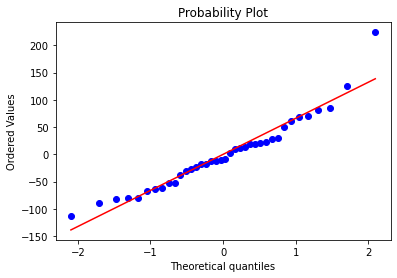

In [18]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [19]:
import statsmodels.api as sm

In [20]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)

In [21]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [22]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.20
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           5.53e-08
Time:                        07:51:52   Log-Likelihood:                -212.78
No. Observations:                  38   AIC:                             435.6
Df Residuals:                      33   BIC:                             443.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          229.7170    225.916      1.017      0.317    -229.913     689.347
Petrol_tax                     -27.9281     15.597     -1.791      0.083     -59.661       3.804
Paved_Highways                  -0.0007      0.004     -0.189      0.851      -0.009       0.007
Average_income                  -0.0676      0.022     -3.094      0.004      -0.112      -0.023
Population_Driver_licence(%)  1497.9360    233.969      6.402      0.000    1021.922    1973.950
==============================================================================
Omnibus:                       11.185   Durbin-Watson:                   2.463
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.429
Skew:                           0.986   Prob(JB):                      0.00330
Kurtosis:                       4.824   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 59.32972677688738
Mean Squared Error: 4041.7386121346526
Root Mean Squared Error: 63.574669579437476


In [ ]:
# Build a model keeping in mind the individual t tests

In [36]:
# Model evaluation metrics - Regression problems

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 50.49937571025761
Mean Squared Error: 3027.5495379189456
Root Mean Squared Error: 55.02317273584781
